# PyClaw: Burgers' Equation

## Using the guide [A quick introduction to PyClaw](https://notebook.community/rjleveque/binder_experiments/clawpack_tests/pyclaw1)

### Author: Carlos Hernani Morales



In [1]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
from clawpack import pyclaw, riemann

In [2]:
riemann_solver = riemann.burgers_1D
solver = pyclaw.ClawSolver1D(riemann_solver)
solver.all_bcs = pyclaw.BC.periodic # 2

dimension = pyclaw.Dimension(0.,1.,500,name='x')
domain = pyclaw.Domain(dimension)

num_eqn = 1
state = pyclaw.State(domain, num_eqn)

xc = state.grid.x.centers
state.q[0,:] = np.sin(np.pi*2*xc) + 0.5
state.problem_data['efix'] = True


claw = pyclaw.Controller()
claw.tfinal = 1.0
claw.solution = pyclaw.Solution(state, domain)
claw.solver = solver
claw.keep_copy = True
claw.output_format = None
claw.num_output_times = 50

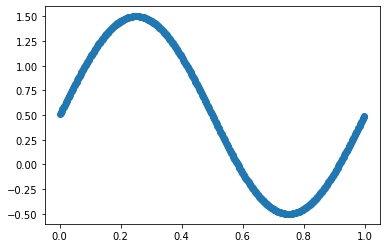

In [3]:
plt.plot(xc, claw.solution.q[0,:], '-o')

In [4]:
claw.run()

2021-11-08 14:33:32,001 INFO CLAW: Solution 0 computed for time t=0.000000
2021-11-08 14:33:32,004 INFO CLAW: Solution 1 computed for time t=0.020000
2021-11-08 14:33:32,006 INFO CLAW: Solution 2 computed for time t=0.040000
2021-11-08 14:33:32,007 INFO CLAW: Solution 3 computed for time t=0.060000
2021-11-08 14:33:32,009 INFO CLAW: Solution 4 computed for time t=0.080000
2021-11-08 14:33:32,010 INFO CLAW: Solution 5 computed for time t=0.100000
2021-11-08 14:33:32,011 INFO CLAW: Solution 6 computed for time t=0.120000
2021-11-08 14:33:32,013 INFO CLAW: Solution 7 computed for time t=0.140000
2021-11-08 14:33:32,014 INFO CLAW: Solution 8 computed for time t=0.160000
2021-11-08 14:33:32,016 INFO CLAW: Solution 9 computed for time t=0.180000
2021-11-08 14:33:32,017 INFO CLAW: Solution 10 computed for time t=0.200000
2021-11-08 14:33:32,018 INFO CLAW: Solution 11 computed for time t=0.220000
2021-11-08 14:33:32,020 INFO CLAW: Solution 12 computed for time t=0.240000
2021-11-08 14:33:32,02

{'cflmax': 0.9002991529061941,
 'dtmin': 0.0012000157915228978,
 'dtmax': 0.0019429681733719205,
 'numsteps': 714}

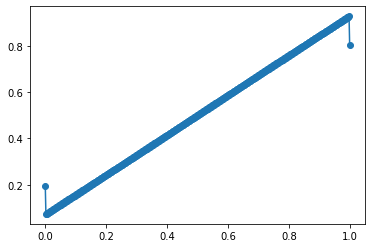

In [5]:
pressure = claw.frames[50].q[0,:]
plt.plot(xc,pressure,'-o')


In [21]:
%matplotlib agg




def create_video(n):
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 1), ylim=(-2, 2))
    frame = claw.frames[0]
    pressure = frame.q[0,:]
    line, = ax.plot([], [], lw=2)
    def fplot(frame_number):
        frame = claw.frames[frame_number]
        pressure = frame.q[0,:]
        line.set_data(xc,pressure)
        return line,
    
    anim = FuncAnimation(
        fig,
        fplot,
        frames=len(claw.frames),
        interval=1,
        blit=False
    )
    return anim


a = create_video(1)